In [1]:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
#没有用bagging和boosting
#stacking    先用几个不同的模型做预测  输出预测值  然后将这几个模型输出的预测值作为特征来训练一个新的模型

In [3]:
# 获取数据

In [4]:
data=pd.read_excel("E://IT//毕设//result/data_twelve.xlsx")
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   租金            12869 non-null  int64  
 1   面积(平方米)       12869 non-null  float64
 2   服务费           12869 non-null  float64
 3   A地铁线          12869 non-null  int64  
 4   B地铁线          12869 non-null  int64  
 5   C地铁线          12869 non-null  int64  
 6   大区标签          12869 non-null  int64  
 7   品牌标签          12869 non-null  int64  
 8   租赁方式标签        12869 non-null  int64  
 9   装修标签          12869 non-null  int64  
 10  朝向标签          12869 non-null  int64  
 11  电梯_标签         12869 non-null  int64  
 12  车位_标签         12869 non-null  int64  
 13  用水_标签         12869 non-null  int64  
 14  用电_标签         12869 non-null  int64  
 15  燃气_标签         12869 non-null  int64  
 16  采暖_标签         12869 non-null  int64  
 17  A付款方式标签       12869 non-null  int64  
 18  B付款方式标签       12869 non-nu

In [5]:
df1=pd.DataFrame(data)

In [23]:
df1.head()

,租金,面积(平方米),服务费,A地铁线,B地铁线,C地铁线,大区标签,品牌标签,租赁方式标签,装修标签,...,平均值特征1,大区+街道平均值特征,朝向标签平均值特征,A地铁线平均值特征,大区英文平均值特征,房屋配置聚类平均值特征2,房屋装修聚类平均值特征3,房屋费用聚类平均值特征4,房屋便利聚类平均值特征5,小区_标签
0,6700,60.00,670.0,9,7,1,3,1,1,1,...,5712.720000,5225.413534,4163.071070,4992.092732,4882.436364,4414.579365,4351.671456,5000.154891,4586.337664,1
1,6400,80.48,640.0,11,1,-1,1,1,1,2,...,5998.750000,5229.564103,4524.850652,4779.522624,4494.741590,5145.811146,4513.637500,5000.154891,4586.337664,2
2,2580,36.00,258.0,16,-1,-1,5,1,1,2,...,2634.666667,3707.724551,4216.757028,3843.047228,4035.890179,4414.579365,4513.637500,5000.154891,4586.337664,3
3,5000,118.00,0.0,6,-1,-1,4,2,1,2,...,5048.131868,4953.176282,4525.573000,4597.347368,4466.491597,4699.096813,4260.068896,4703.166293,4586.337664,4
4,2300,34.00,0.0,20,20,-1,1,2,1,2,...,2735.000000,4020.554656,4216.757028,3262.638298,4494.741590,4414.579365,4513.637500,4703.166293,4586.337664,5


In [ ]:
# 最大最小值缩放

In [28]:
def min_max_scaling(data, feature_range=(0, 1)):
    """
    对每列数据进行最大最小值缩放
    
    参数：
    - data：要进行缩放的数据，可以是 NumPy 数组、Pandas DataFrame 或其他类似数据结构
    - feature_range：缩放后的特征范围，默认为 (0, 1)
    
    返回值：
    - scaled_data：缩放后的数据
    """
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    range_min, range_max = feature_range
    
    scaled_data = (data - min_val) / (max_val - min_val) * (range_max - range_min) + range_min
    
    return scaled_data


In [29]:
df2=min_max_scaling(df1)

In [30]:
x_columns=[ '面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
       '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
       '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
       '房+卫+厅', '房/总', '卫/总', '厅/总', '卧室面积', '户型', '是否地铁', '平均值特征1',
       '大区+街道平均值特征', '朝向标签平均值特征', 'A地铁线平均值特征', '大区英文平均值特征', '房屋配置聚类平均值特征2',
       '房屋装修聚类平均值特征3', '房屋费用聚类平均值特征4', '房屋便利聚类平均值特征5', '小区_标签']
y_label='租金'
x=df2[x_columns]
y=df2[y_label]
y.isnull().sum()

0

In [31]:
#2.分割数据集
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=12)

In [32]:
#3.特征转换
vector=DictVectorizer(sparse=True)
x_train=vector.fit_transform(train_x.to_dict(orient='records'))
x_test=vector.transform(test_x.to_dict(orient='records'))

In [33]:
x_train

<9008x40 sparse matrix of type '<class 'numpy.float64'>'
	with 360320 stored elements in Compressed Sparse Row format>

In [34]:
x_train.shape

(9008, 40)

In [35]:
#4.降维----线性回归和svm可以采用降维后的特征
pca=PCA(0.98)
pca_x_train=pca.fit_transform(x_train.toarray())
pca_x_test=pca.transform(x_test.toarray())

In [36]:
pca_x_train.shape

(9008, 22)

In [37]:
#5.特征标准化
trans=StandardScaler()
new_x_train=trans.fit_transform(pca_x_train)
new_x_test=trans.transform(pca_x_test)

In [38]:
new_x_train.shape

(9008, 22)

In [39]:
def rmse(y_true,y_pred):
    y_pred=np.exp(y_pred)-1#转换成真实的租金
    y_true=np.exp(y_true)-1
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [40]:
# 构建子模型

In [41]:
## 构建岭回归模型

In [43]:
#1.参数搜索
ridge=Ridge(solver='svd')
params={
    "alpha":[0.005,0.01,1,5,10,20,50,80,100]

}
model1=GridSearchCV(ridge,param_grid=params,cv=5,n_jobs=-1)
model1.fit(new_x_train,train_y)
model1.best_params_   
#{'alpha': 10, 'fit_intercept': True}

{'alpha': 50}

In [44]:
#利用搜索出的最优参数构建模型
ridge=Ridge(solver='svd',alpha=50)
ridge.fit(new_x_train,train_y)

Ridge(alpha=50, solver='svd')

In [45]:
y_pred_test=ridge.predict(new_x_test)
y_pred_train=ridge.predict(new_x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.3120195766727495
测试集rmse： 0.3106414568210606


In [46]:
# 构建lasso回归

In [47]:
#1.参数搜索
lasso=Lasso()
params={
    "alpha":[0.001,0.01,0.05,0.1,0.5,1,5,10],
    "fit_intercept":[True,False] 
}
model2=GridSearchCV(lasso,param_grid=params,cv=5,n_jobs=-1)
model2.fit(new_x_train,train_y)
model2.best_params_
#{'alpha': 0.001, 'fit_intercept': True}

{'alpha': 0.001, 'fit_intercept': True}

In [48]:
#利用搜索出的最优参数构建模型
lasso=Lasso(alpha=0.001)
lasso.fit(new_x_train,train_y)

Lasso(alpha=0.001)

In [49]:
y_pred_test=lasso.predict(new_x_test)
y_pred_train=lasso.predict(new_x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.3125440309531014
测试集rmse： 0.3111107982907412


In [50]:
#  构建随机森林

In [53]:
#1.参数搜索 
rf=RandomForestRegressor(max_features='sqrt')#设置max_features='sqrt'，不然太耗时间
params={
    "n_estimators":[200],#[200,500,700],
    "max_depth":[40,50,60],
    "min_samples_split":[20,30,50,80,100],
    "min_samples_leaf":[10,20,30]
}
model3=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1,verbose=2)
model3.fit(x_train,train_y)
model3.best_params_
# {'max_depth': 40,
#  'min_samples_leaf': 10,
#  'min_samples_split': 20,
#  'n_estimators': 200}

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 40,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 200}

In [66]:
#利用搜索出的最优参数构建模型
rf=RandomForestRegressor(n_estimators=200,
                         max_features=0.8,
                         max_depth=40,
                         min_samples_split=20,
                         min_samples_leaf=10,
                         n_jobs=-1)
rf.fit(x_train,train_y)

RandomForestRegressor(max_depth=40, max_features=0.8, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=200, n_jobs=-1)

In [67]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.20052790185911978
测试集rmse： 0.24450520717279103


In [68]:
# 构建决策树

In [74]:
tree=DecisionTreeRegressor()
params={
    "max_depth":[40,50,60,70],
    "min_samples_split":[5,10,20,30,40,50],
    "min_samples_leaf":[2,3,5,7,9,11,13,15,18,20,22,24,26,28]
}
model4=GridSearchCV(tree,param_grid=params,cv=5,n_jobs=-1)
model4.fit(x_train,train_y)
model4.best_params_
#{'max_depth': 50, 'min_samples_leaf': 11, 'min_samples_split': 30}

{'max_depth': 60, 'min_samples_leaf': 20, 'min_samples_split': 5}

In [83]:
from sklearn.tree import DecisionTreeRegressor
#利用搜索出的最优参数构建模型
tree=DecisionTreeRegressor(max_depth=60,min_samples_leaf=20,min_samples_split=5)
tree.fit(x_train,train_y)

DecisionTreeRegressor(max_depth=60, min_samples_leaf=20, min_samples_split=5)

In [84]:
y_pred_test=tree.predict(x_test)
y_pred_train=tree.predict(x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.2311777181553206
测试集rmse： 0.2792577444584976


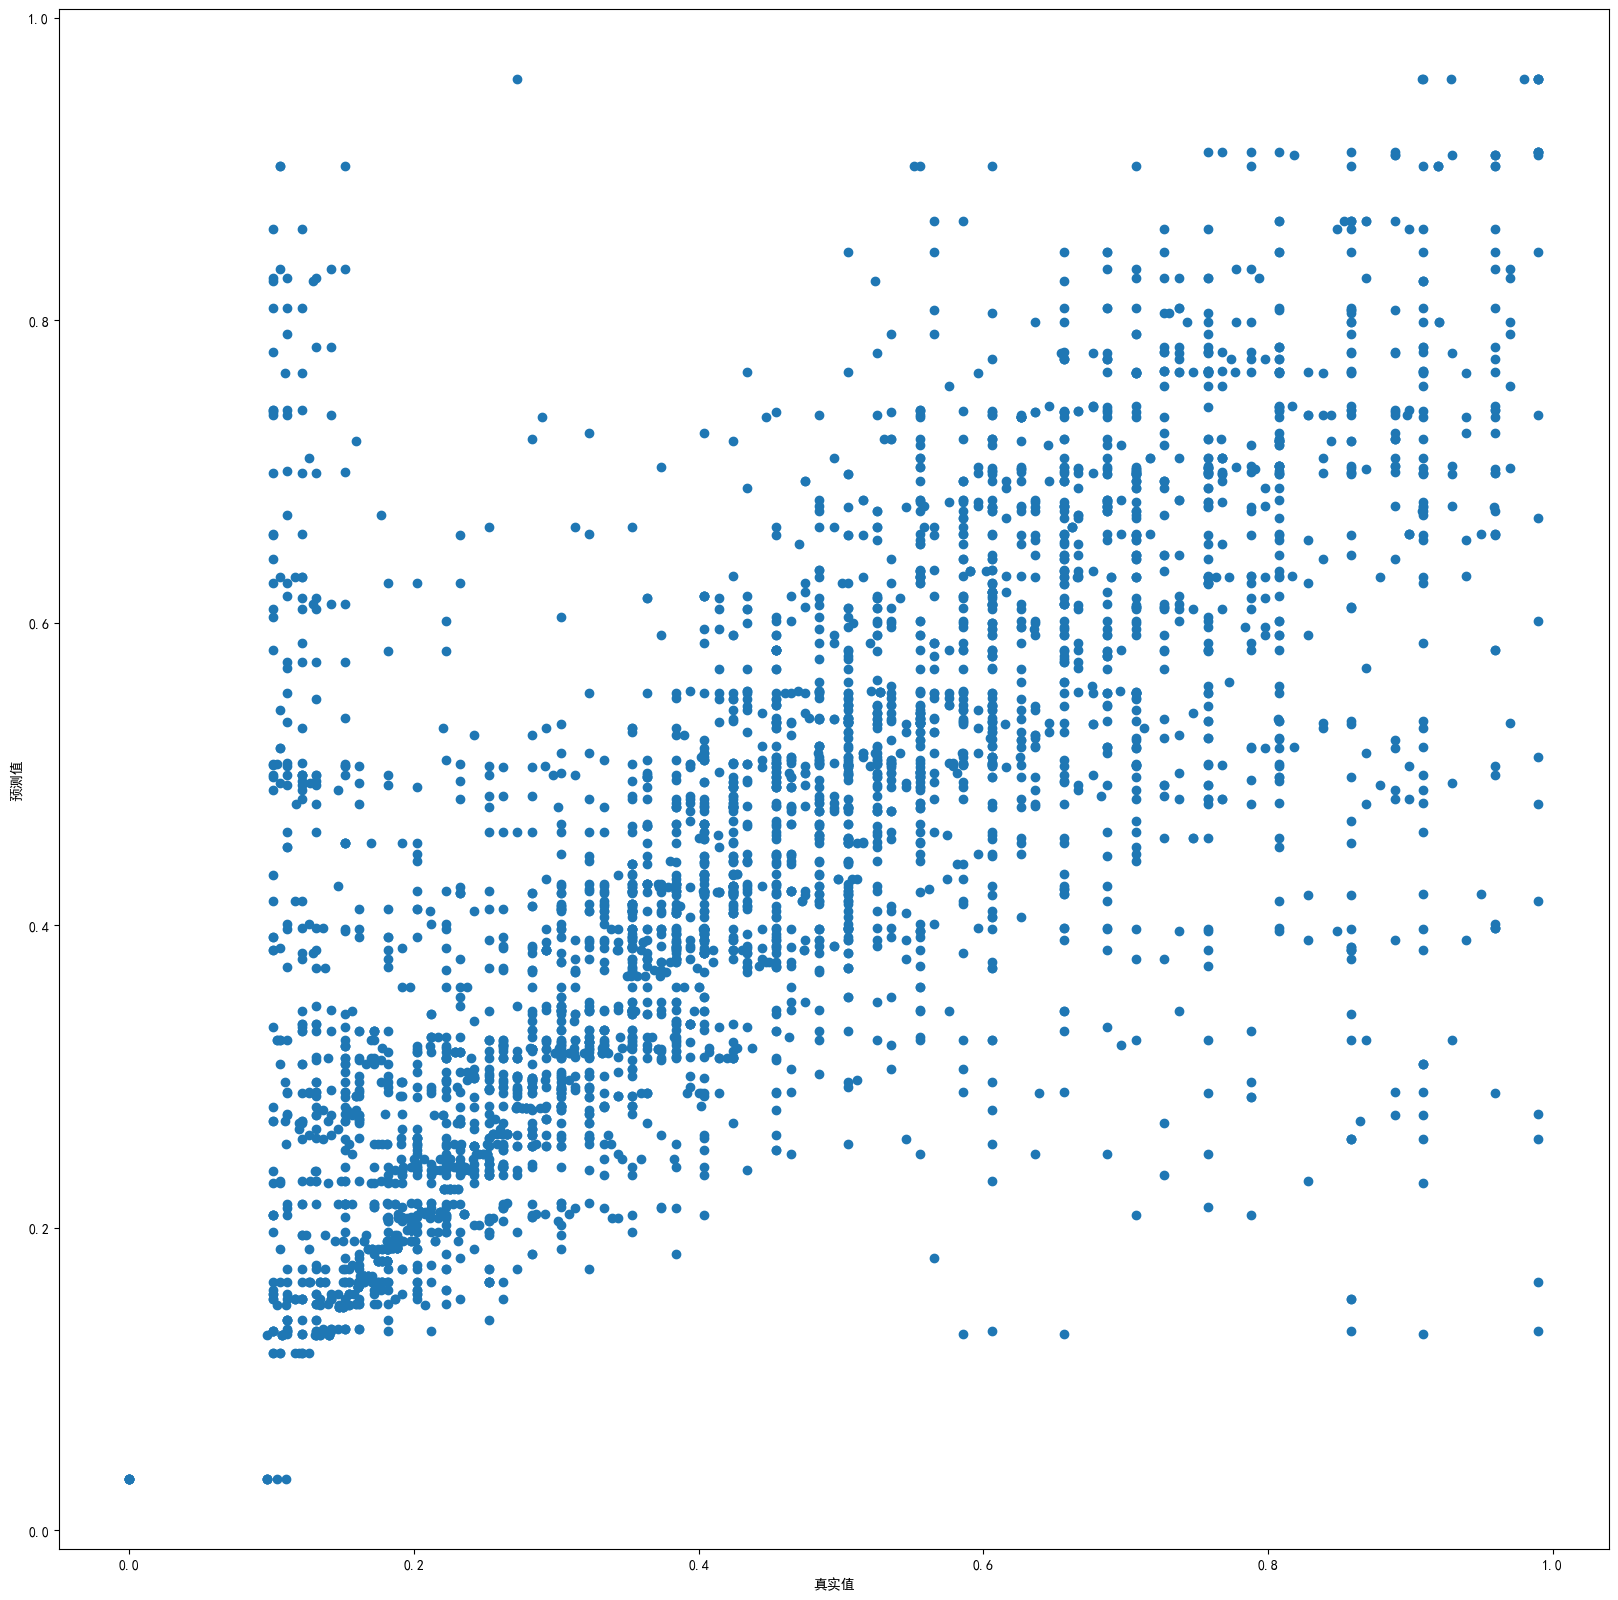

In [85]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

In [86]:
# 构建支持向量机

In [ ]:
# #1.参数搜索----数据量大 svm太耗时，调参几乎不可能
# svr=SVR()
# params={
#     "gamma":[0.001,0.01,0.1,0.5,1,5],
#     "C":[0.001,0.1,0.5,1,5] 
# }
# model5=GridSearchCV(svr,param_grid=params,cv=5,n_jobs=-1,verbose=10)
# model5.fit(new_x_train,train_y)
# model5.best_params_

In [ ]:
#随意选一组参数   --- 耗时太长 放弃该模型
svr=SVR(gamma=0.1,C=0.5)
svr.fit(new_x_train,train_y)
y_pred=svr.predict(new_x_test)
rmse(test_y,y_pred)

In [60]:
# 构建xgboost模型

In [61]:
import xgboost as xgb
params={
    "objective":'reg:linear',
    'eta':0.1,
    'gamma': 0.05,
    'silent': 1,
    'max_depth':45, 
    'min_child_weight':0.5,
    'sub_sample':0.6,
    'reg_alpha':0.5,
    'reg_lambda':0.8,
    'colsample_bytree':0.5
}
dtrain = xgb.DMatrix(x_train,train_y)
dtest = xgb.DMatrix(x_test,test_y)
bst = xgb.train(params, dtrain, num_boost_round=2000)

C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [01:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\xgboost\core.py:160: UserWarning: [01:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent", "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:
y_pred_test=bst.predict(dtest)
y_pred_train=bst.predict(dtrain)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.17324160938921435
测试集rmse： 0.2342449287932587


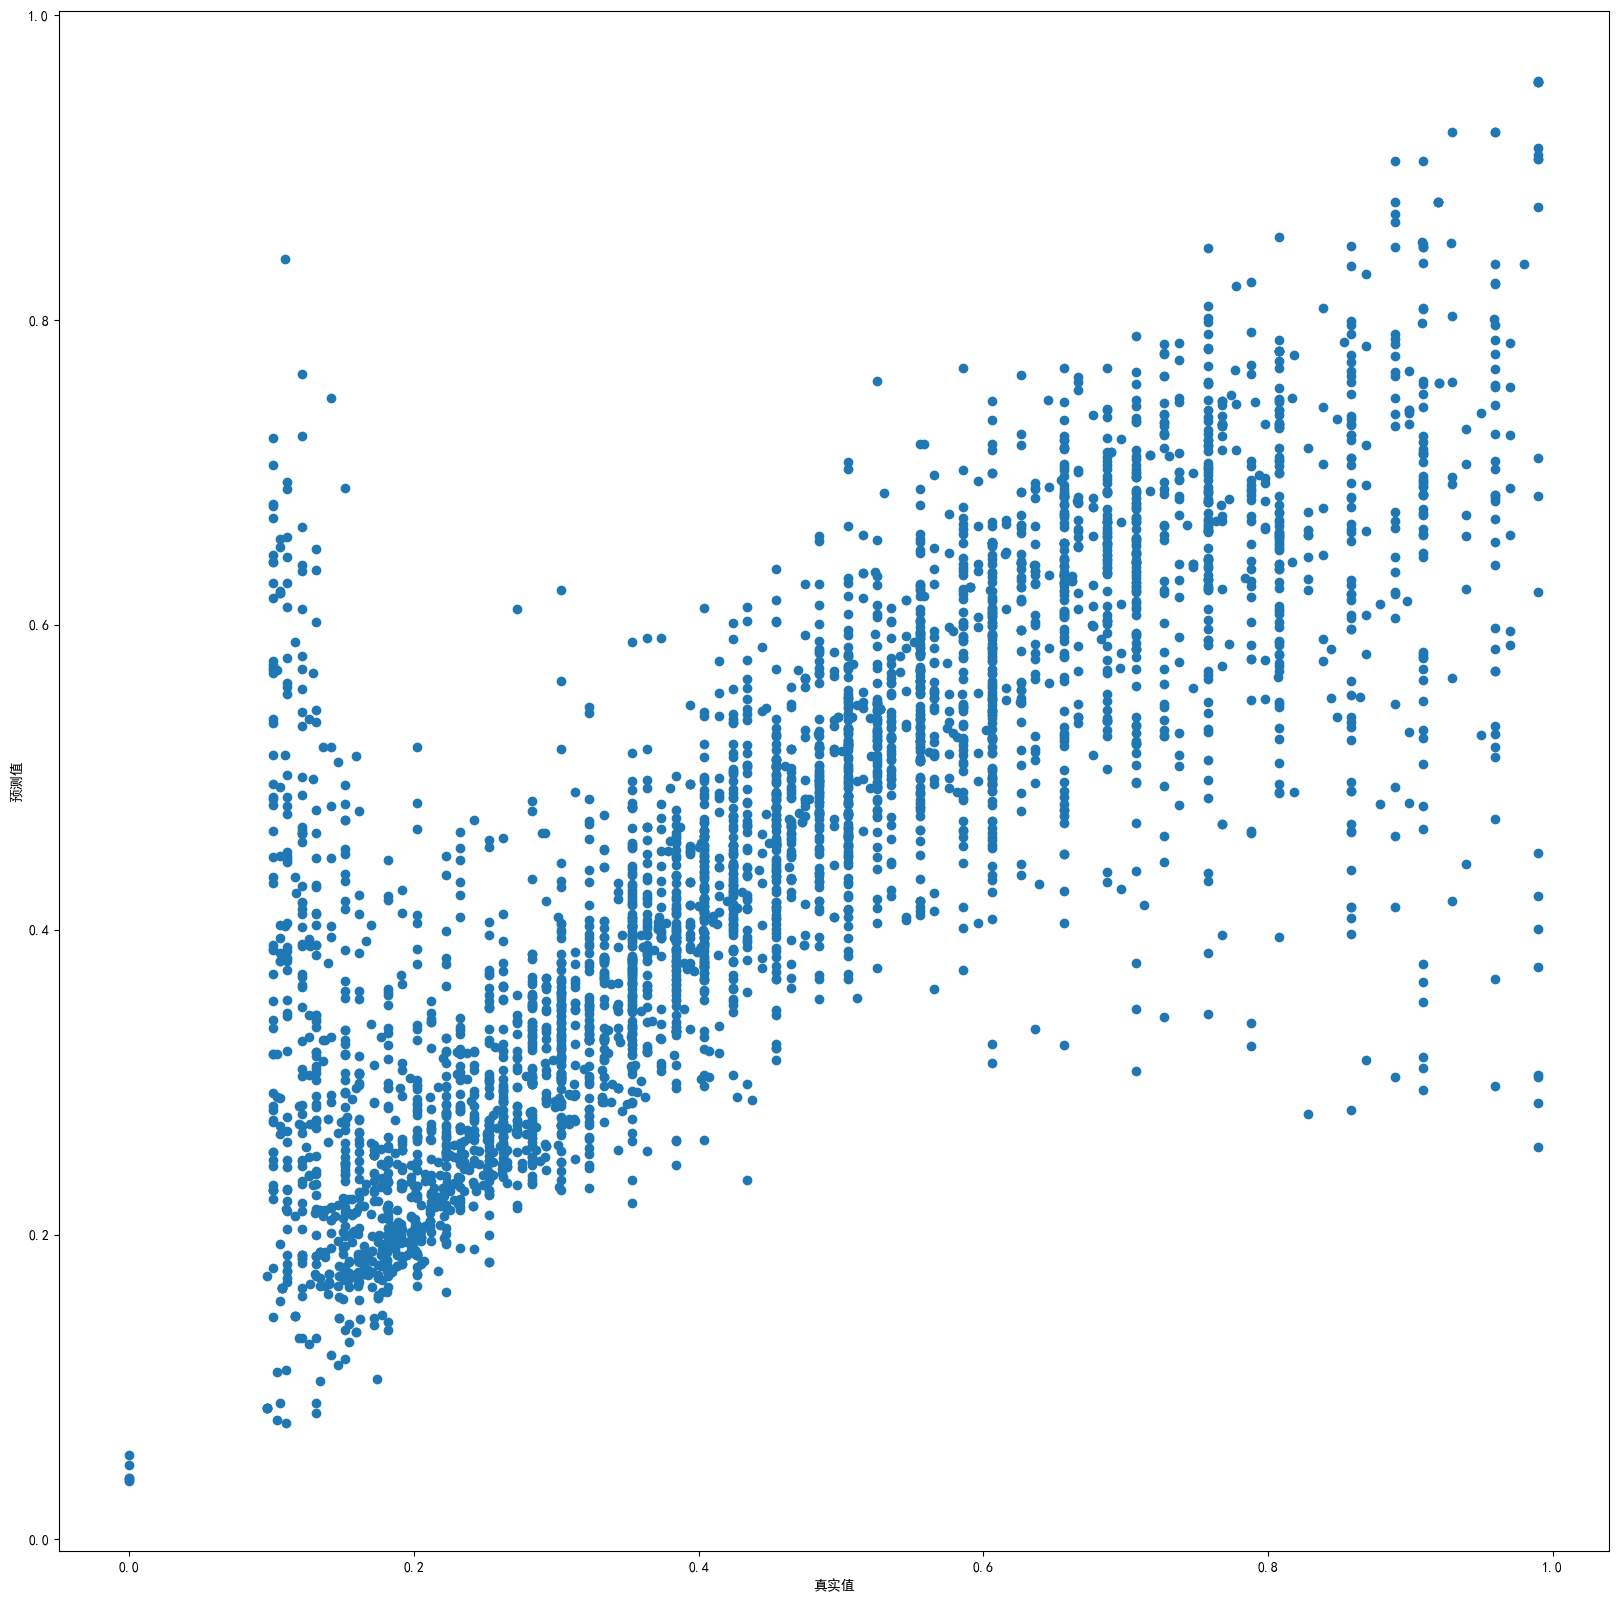

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

In [64]:
# Stacking融合

In [87]:
#获取每个子模型的预测结果作为特征
train_features=[]
train_features.append(ridge.predict(new_x_train))#将每个模型预测值保存起来
train_features.append(lasso.predict(new_x_train))
# train_features.append(svr.predict(new_x_train))#这个太慢了  不要了
train_features.append(rf.predict(x_train))
train_features.append(tree.predict(x_train))
train_features.append(bst.predict(dtrain))

test_features=[]
test_features.append(ridge.predict(new_x_test))
test_features.append(lasso.predict(new_x_test))
# test_features.append(svr.predict(new_x_test))
test_features.append(rf.predict(x_test))
test_features.append(tree.predict(x_test))
test_features.append(bst.predict(dtest))

In [88]:
mx_train=np.vstack(train_features).T
mx_test=np.vstack(test_features).T
mx_train.shape

(9008, 5)

In [90]:
stack_model=Ridge(fit_intercept=False ,solver='svd')
params={
    "alpha":np.logspace(-2,3,20)
}
model=GridSearchCV(stack_model,param_grid=params,cv=5,n_jobs=-1)
model.fit(mx_train,train_y)
model.best_params_

{'alpha': 0.01}

In [93]:
stack_model=Ridge(alpha=0.01,fit_intercept=False,solver='svd')
stack_model.fit(mx_train,train_y)
y_pred=stack_model.predict(mx_test)
y_pred_train=stack_model.predict(mx_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred))

训练集rmse： 0.15061130664762992
测试集rmse： 0.23291828206314852


In [94]:
stack_model.coef_

array([ 0.65132149, -0.98272589, -0.33257503, -0.03089775,  1.69589293])

In [95]:
# 模型保存

In [96]:
import pickle

with open("E:\\IT\\毕设\\result\\模型\\model.pkl","wb") as f:
    pickle.dump({
        "vector":vector,
        "pca":pca,
        "sc":trans,
        "ridge":ridge,
        "lasso":lasso,
        "rf":rf,
        "tree":tree,
        "bst":bst,
        "stack":stack_model
    },f)